In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200

pomme = False

if pomme :
    constrained_signals_db = f'/home/gomes/synthetic-data/constrained-signals-{batchSize}.json'

    borelli_mmp81_db = f'/home/gomes/synthetic-data/borelli-mmpdf81-{batchSize}.json'
    borelli_mmp27_db = f'/home/gomes/synthetic-data/borelli-mmpdf27-{batchSize}.json'
    borelli_mmp9_db = f'/home/gomes/synthetic-data/borelli-mmpdf9-{batchSize}.json'
    borelli_mmp3_db = f'/home/gomes/synthetic-data/borelli-mmpdf3-{batchSize}.json'

    icassp_mp_db = f'/home/gomes/synthetic-data/icassp-mp-{batchSize}.json'
    icassp_omp_db = f'/home/gomes/synthetic-data/icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'/home/gomes/synthetic-data/icassp-alphaCSC-{batchSize}.json'

else:
    constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\constrained-signals-{batchSize}.json'

    borelli_mmp81_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf81-{batchSize}.json'
    borelli_mmp27_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf27-{batchSize}.json'
    borelli_mmp9_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf9-{batchSize}.json'
    borelli_mmp3_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf3-{batchSize}.json'
    
    icassp_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mp-{batchSize}.json'
    icassp_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-alphaCSC-{batchSize}.json'

In [3]:
workbench = CSCWorkbench(constrained_signals_db)
workbench.set_dictionary(dictionary)
workbench.load_data()

## Top 10 of signals where OMP fails

In [4]:

#metrics_per_mse_diff = workbench.sparVar_sortByBestMSEDiff(borelli_mmp27_db, icassp_omp_db, ascending=False)
#print(Counter([snr for snr in metrics_per_mse_diff['snr']]))

In [5]:
#metrics_per_mse_diff = metrics_per_mse_diff.loc[metrics_per_mse_diff['snr'] == 10]
#print(metrics_per_mse_diff.head(20))
#ids = [id for id in metrics_per_mse_diff.head(20)['id']]
#print(ids)

## Signal ID = 1987

In [6]:
#signal_id = ids[13]
signal_id = 1987

In [7]:
#workbench.plotOrthogonalSignalErrorPerOverlapFromId(db_path=icassp_omp_db, db_key='omp', id=signal_id, cmap='Greys')

In [8]:
#workbench.plot_MMP_OMP_comparisonPerOverlapFromId(mmp_db_path=borelli_mmp3_db, omp_db_path=icassp_omp_db, id=signal_id, cmap='Greys')

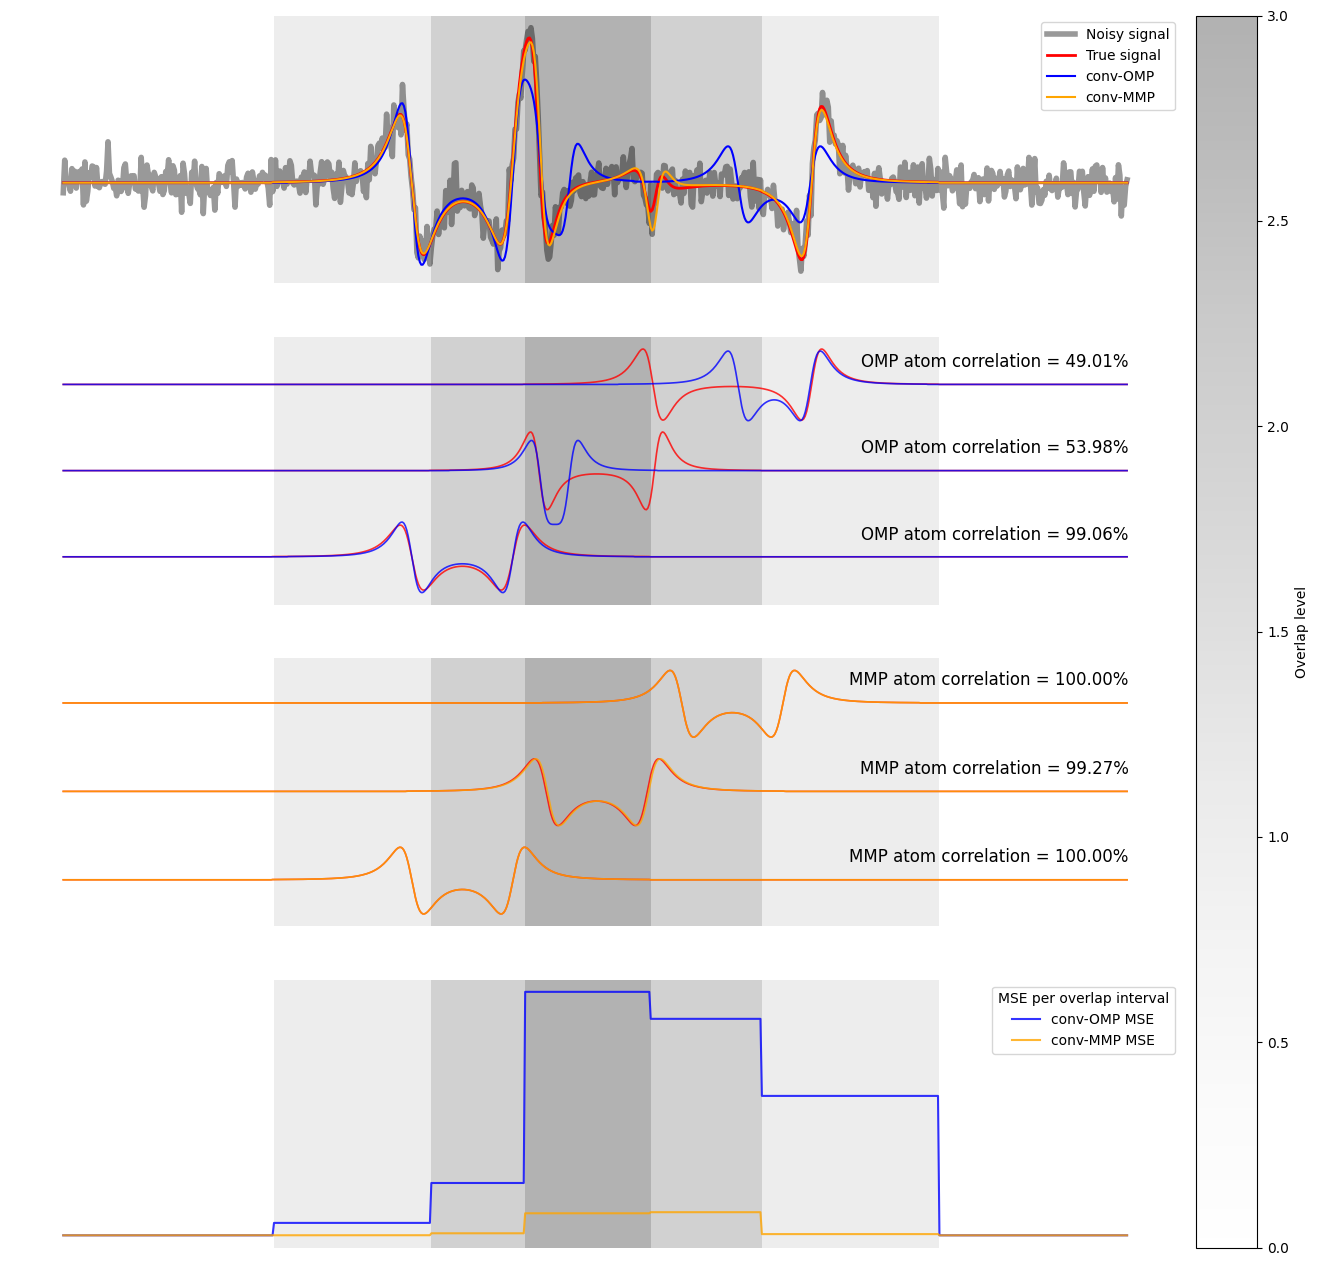

In [9]:
workbench.plot_MMP_OMP_decompositionPerOverlapFromId(mmp_db_path=borelli_mmp3_db, omp_db_path=icassp_omp_db, id=signal_id, cmap='Greys')

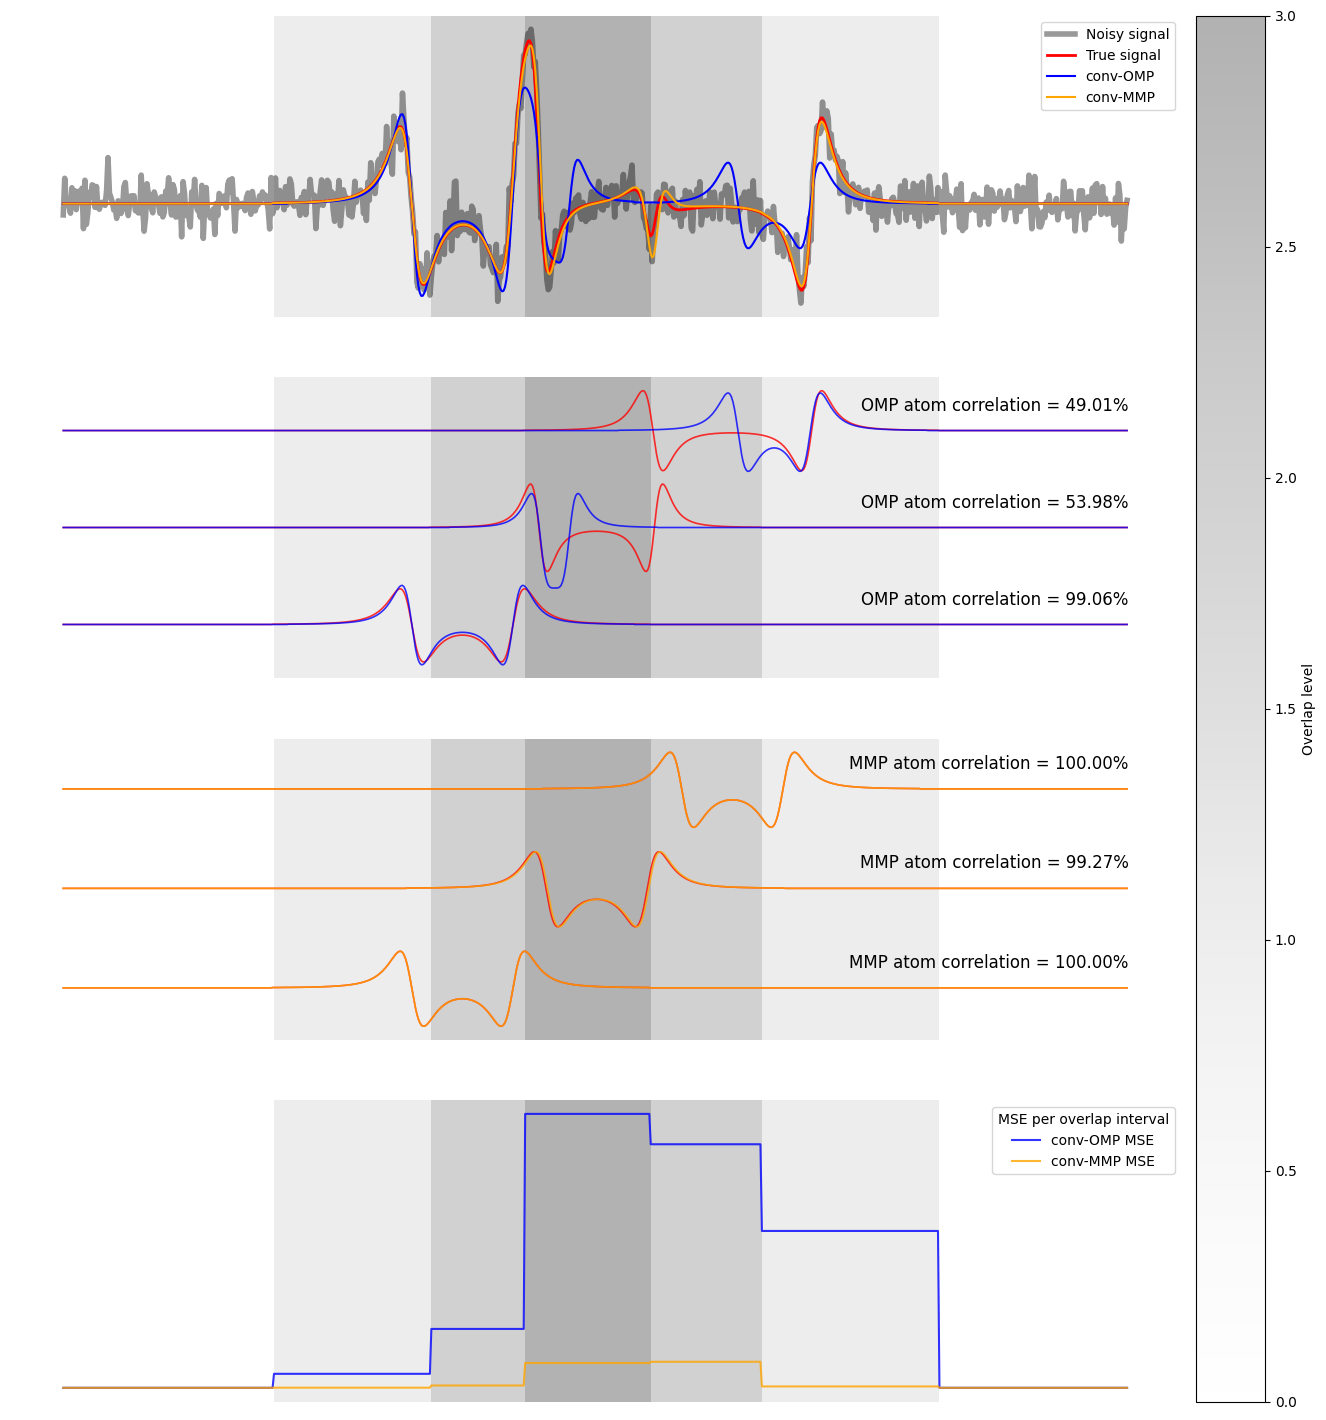

In [10]:
workbench.plot_MMP_OMP_decompositionPerOverlapFromId(mmp_db_path=borelli_mmp3_db, omp_db_path=icassp_omp_db, id=signal_id, cmap='Greys', figsize=(18, 18))